In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
# tensorflow supports version of numpy as 1.16.4 (april 21st)
import matplotlib.pyplot as plt

In [2]:
# 1. DATA IMPORT & PREPROCESS
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_images: (60000, 28, 28)
# test_images: (10000, 28, 28)

train_images.shape

(60000, 28, 28)

In [3]:
# 2. Normalize data
train_images = train_images / 255
test_images = test_images / 255

In [4]:
# 3. MODEL
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

W0422 14:44:10.800633 4557479360 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
# 4. COMPILE
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

In [6]:
# 5. TRAIN
history = model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2633 - acc: 0.9243
Epoch 2/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1178 - acc: 0.9654
Epoch 3/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0790 - acc: 0.9764
Epoch 4/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0582 - acc: 0.9822
Epoch 5/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0459 - acc: 0.9852


In [7]:
# 6. EVALUATION
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 0s - loss: 0.0746 - acc: 0.9778


In [9]:
history.history

{'loss': [0.2633414283817013,
  0.11775582094043494,
  0.07904977154086033,
  0.05819649624762436,
  0.04589263054188341],
 'acc': [0.92433333, 0.96541667, 0.97641665, 0.98218334, 0.98525]}

Text(0.5, 0, 'epoch')

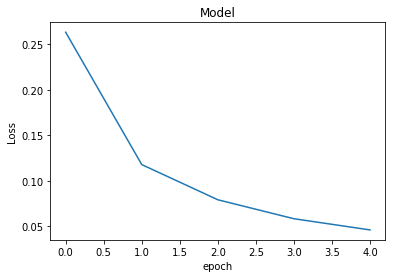

In [10]:
plt.plot(history.history['loss']) # x - axis is automatically the index
plt.title('Model')
plt.ylabel('Loss')
plt.xlabel('epoch')

In [11]:
# 7: Make predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
# Softmax() outputs the max value 
predictions = probability_model.predict(test_images)

In [12]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(str(predicted_label),
                                100*np.max(predictions_array),
                                str(true_label)),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue') # will overlay the red

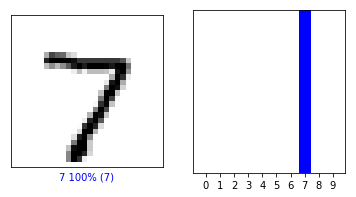

In [37]:
i = np.random.randint(6000)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

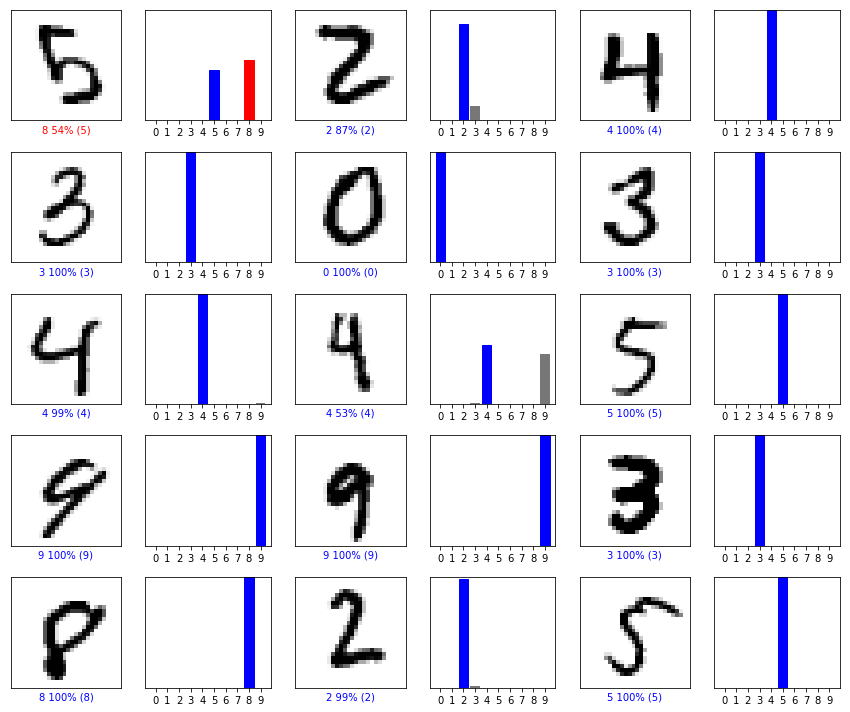

In [29]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  index = np.random.randint(6000-num_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i + index, predictions[i + index], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i + index, predictions[i + index], test_labels)
plt.tight_layout()
plt.show()

In [24]:
# DISPLAYING FALSE LABELS

false_labels = []
for i in range(len(predictions)):
    prediction = np.argmax(predictions[i])
    if prediction != test_labels[i]:
        false_labels.append(i)

len(false_labels)

222

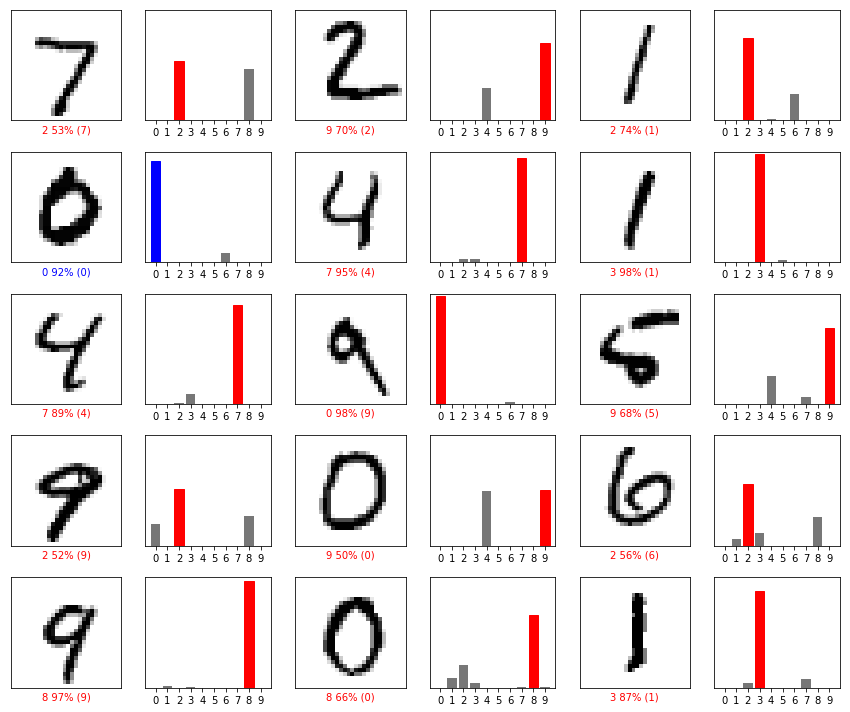

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[false_labels[i]], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[false_labels[i]], test_labels)
plt.tight_layout()
plt.show()

784


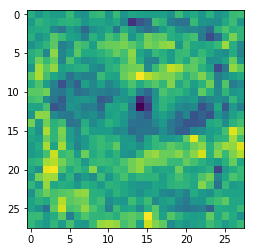

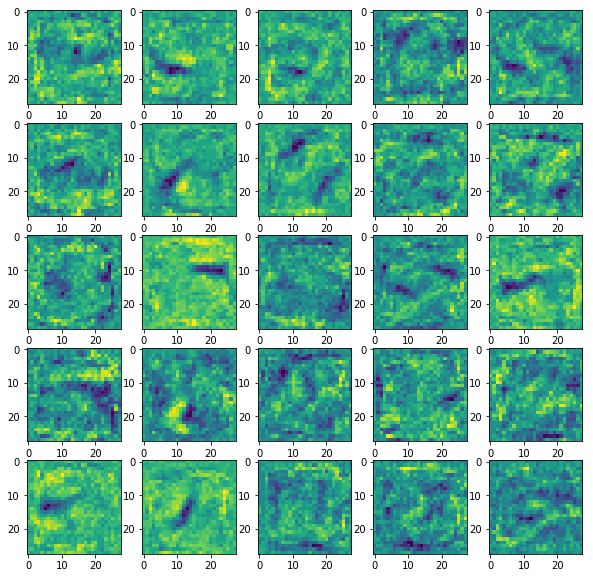

In [92]:
# See hidden layers

for layer in model.layers:
    weights = layer.get_weights()

# for i in range(len(weights[1])):
#     weights[0][i] = np.reshape(weights[0][i], (-1, 28))

# for layer in model.layers: print(layer.get_config(), layer.get_weights())
first_layer_weights = model.layers[1].get_weights()[0]
print(len(first_layer_weights))

neurons = [None]*128
for i in range(len(neurons)):
    neurons[i] = np.zeros(784)
    for j in range(len(first_layer_weights)):
        neurons[i][j] = (first_layer_weights[j][i])
    neurons[i] = neurons[i].reshape(28, 28)

rows = 5
columns = 5
num = rows * columns

plt.figure(figsize=(2*columns, 2*rows))
for i in range(num):
    plt.subplot(rows, columns, i+1)
    plt.imshow(neurons[i], cmap='viridis')
